<a href="https://colab.research.google.com/github/AnkitaSahu1312/AnkitaSahu1312/blob/main/exp_4_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

# Part 1 - Data Preprocessing


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling (1).csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#Create dummy variables
#pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
#print(X['Geography'].value_counts())
#geography


In [4]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)
X


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [5]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

In [8]:
# Importing the Keras libraries and packages

import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [9]:
# Initialising the ANN
classifier = Sequential()

In [10]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(3, kernel_initializer = 'uniform',activation='relu',input_dim=11))

In [11]:
# Adding the second hidden layer
classifier.add(Dense( 3, kernel_initializer = 'uniform',activation='relu'))

In [12]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [13]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
model_history = classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
800/800 [==============================] - 8s 3ms/step - loss: 0.5174 - accuracy: 0.7951
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4344 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4289 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4249 - accuracy: 0.7960
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4219 - accuracy: 0.7960
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4193 - accuracy: 0.8169
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4172 - accuracy: 0.8223
Epoch 8/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4154 - accuracy: 0.8281
Epoch 9/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4142 - accuracy: 0.8295
Epoch 10/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4131 - accura

In [15]:
# list all data in history

print(model_history.history.keys())


dict_keys(['loss', 'accuracy'])


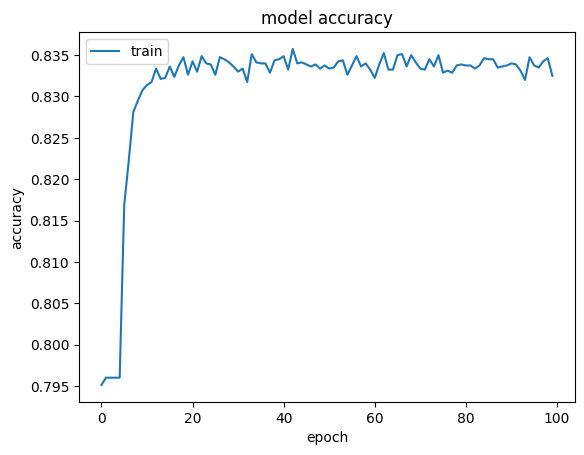

In [16]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

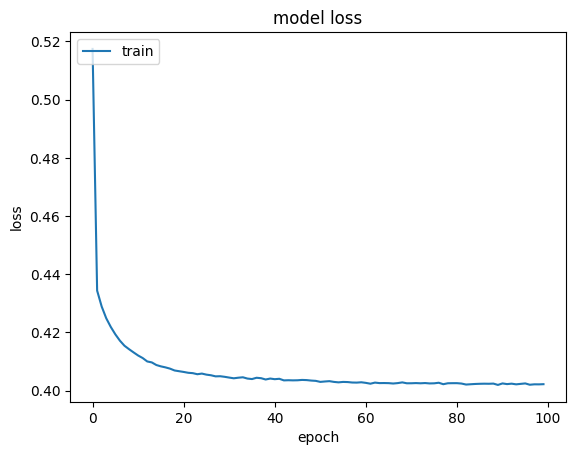

In [17]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred


63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm



array([[1548,   47],
       [ 271,  134]])

In [20]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.841